In [9]:
from torch.utils.data import Dataset

import pandas as pd
import torch

In [10]:
class Dataset(Dataset):
    def __init__(self, path):
        self.loader = pd.read_csv(path, encoding='ISO-8859-1')
    
    def __len__(self):
        return len(self.loader)
    
    def __getitem__(self):
        return self.loader

In [11]:
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np

In [12]:
root = '/content/drive/MyDrive/Program/Python/Data ML DL/Datasets/US  E-commerce records 2020.csv'
load_data = Dataset(root)

load_data.__getitem__()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [13]:
counter_category = Counter(load_data.__getitem__()['Category'])
most_common_category = counter_category.most_common()
most_common_category = pd.DataFrame(most_common_category)
most_common_category.columns = ['category', 'counts']
most_common_category

,category,counts
0,Office Supplies,2002
1,Furniture,686
2,Technology,624


([<matplotlib.patches.Wedge at 0x7f0d6f519550>,
 [Text(-0.38680498223177373, 1.135949781337484, 'Office Supplies'),
  Text(-0.29974879169743684, -1.1102480181814904, 'Furniture'),
  Text(0.9543680261609988, -0.6416242441192189, 'Technology')],
 [Text(-0.22563623963520132, 0.6626373724468655, '60.4%'),
  Text(-0.1694232300898556, -0.6275314885373641, '20.7%'),
  Text(0.5394254060909993, -0.3626571814586889, '18.8%')])

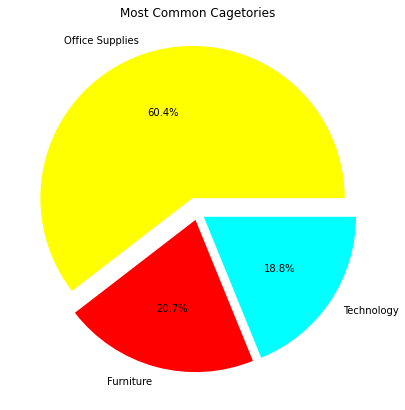

In [14]:
def draw_graph(label, colors, explode, sizes):
    plt.figure(figsize=(7, 7))
    plt.title('Most Common Cagetories')
    return plt.pie(sizes, labels=label, colors=colors, explode=explode, autopct='%1.1f%%')

labels = most_common_category['category']
colors = ['yellow', 'red', 'cyan']
explode = [0.1, 0.05, 0.05]
sizes = most_common_category['counts']

draw_graph(labels, colors, explode, sizes)

             counts
date               
2020-01-01   48.896
2020-01-01  474.430
2020-01-01  141.420
2020-01-01  310.744
2020-01-04  127.950
...             ...
2020-12-29  258.750
2020-12-29  101.120
2020-12-29  393.568
2020-12-29   68.460
2020-12-30  323.136

[686 rows x 1 columns]


Text(0.5, 0, 'Months')

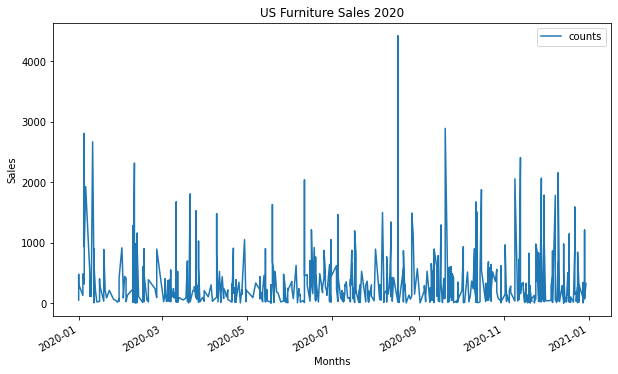

In [15]:
dataframe = pd.DataFrame(
    {'date': load_data.__getitem__()['Order Date'],
     'category': load_data.__getitem__()['Category'],
     'counts': load_data.__getitem__()['Sales']}
)

dataframe['date'] = pd.to_datetime(dataframe['date'])

dataframe_furniture = dataframe[(dataframe['category'] == 'Furniture')].sort_values(by='date')
dataframe_furniture = dataframe_furniture.set_index('date')
dataframe_furniture = dataframe_furniture.drop('category', axis=1)

print(dataframe_furniture)

dataframe_furniture.fillna(method='pad')
dataframe_furniture.plot(figsize=(10, 6), subplots=True)

plt.title('US Furniture Sales 2020')
plt.ylabel('Sales')
plt.xlabel('Months')

In [16]:
dataframe_furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 686 entries, 2020-01-01 to 2020-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  686 non-null    float64
dtypes: float64(1)
memory usage: 10.7 KB


In [17]:
dataframe_furniture = dataframe_furniture.fillna(method='ffill')
scaler = MinMaxScaler(feature_range=(-1, 1))
dataframe_furniture['counts'] = scaler.fit_transform(dataframe_furniture['counts'].values.reshape(-1, 1))

In [31]:
def load_data(dataframe, look_back):
    data_raw = dataframe.values
    data = []

    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index:index+look_back])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)

    x_train = data[:train_set_size, :-1]
    y_train = data[:train_set_size, -1]

    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1]

    return [x_train, y_train, x_test, y_test]

look_back = 10
x_train, y_train, x_test, y_test = load_data(dataframe_furniture, look_back)

print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (541, 9, 1)
y_train.shape = (541, 1)
x_test.shape = (135, 9, 1)
y_test.shape = (135, 1)


In [19]:
x_train_to_tensor = torch.from_numpy(x_train).type(torch.Tensor)
x_test_to_tensor = torch.from_numpy(x_test).type(torch.Tensor)
y_train_to_tensor = torch.from_numpy(y_train).type(torch.Tensor)
y_test_to_tensor = torch.from_numpy(y_test).type(torch.Tensor)

x_train_to_tensor.size(), y_train_to_tensor.size()

(torch.Size([541, 9, 1]), torch.Size([541, 1]))

In [20]:
from torch import nn
import math

In [21]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        #hidden dimension
        self.hidden_dim = hidden_dim

        #numbers of hidden layer
        self.num_layers = num_layers

        #batch_first=True causes input/output tensors to be out of shape
        #(batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        #read out layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # initialize hidden states with zero
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # initialize cell states
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))

for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [22]:
# Train model
epochs = 100
hist = np.zeros(epochs)

seq_dim = look_back-1
for epoch in range(epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train_to_tensor)

    loss = loss_fn(y_train_pred, y_train_to_tensor)
    if epoch % 10 == 0 and epoch !=0:
        print("Epoch ", epoch, "MSE: ", loss.item())
    hist[epoch] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

Epoch  10 MSE:  0.08217107504606247
Epoch  20 MSE:  0.042902540415525436
Epoch  30 MSE:  0.040610410273075104
Epoch  40 MSE:  0.039707545191049576
Epoch  50 MSE:  0.03952212631702423
Epoch  60 MSE:  0.03948592022061348
Epoch  70 MSE:  0.03949861600995064
Epoch  80 MSE:  0.03950134292244911
Epoch  90 MSE:  0.03949131816625595


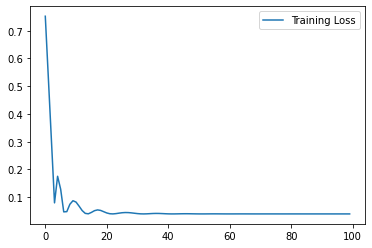

In [23]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [24]:
np.shape(y_train_pred)

torch.Size([541, 1])

In [25]:
y_test_pred = model(x_test_to_tensor)
y_test_pred.shape

torch.Size([135, 1])

In [26]:
# make predictions
y_test_pred = model(x_test_to_tensor)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_to_tensor.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_to_tensor.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 438.58 RMSE
Test Score: 465.51 RMSE


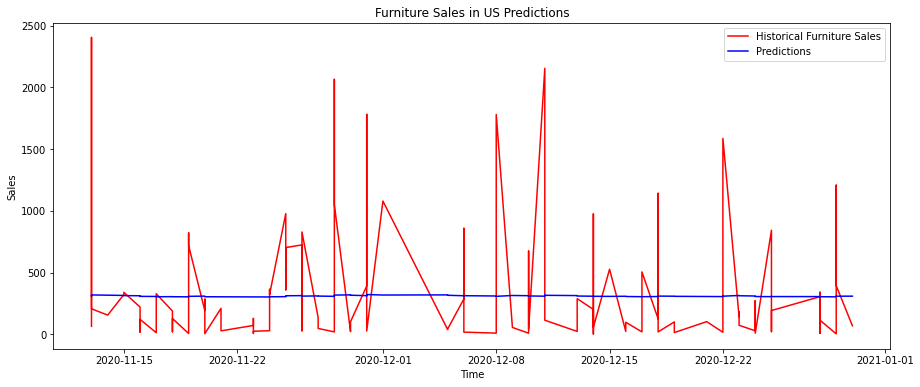

In [27]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(dataframe_furniture[len(dataframe_furniture)-len(y_test):].index, y_test, color='red', label='Historical Furniture Sales')
axes.plot(dataframe_furniture[len(dataframe_furniture)-len(y_test):].index, y_test_pred, color='blue', label='Predictions')
#axes.xticks(np.arange(0,394,50))

plt.title('Furniture Sales in US Predictions')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.savefig('ibm_pred.png')
plt.show()